In [11]:
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyNBS import pyNBS_plotting as plot
%matplotlib inline

In [4]:
folder_path = '/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-02-02_rerun/'
folder = os.listdir(folder_path)
default_path = '/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-02-02_rerun/'
clin_data_fn = '/cellar/users/t1jia/pyNBS/Examples/Example_Data/Clinical_Files/BLCA.clin.merged.surv.txt'

#### For p-val heatmap

In [16]:
p_df = pd.DataFrame(np.zeros((9,6)),index=np.arange(0.1, 1.0, 0.1), 
             columns=range(2,8))

/cellar/users/jkhuang/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


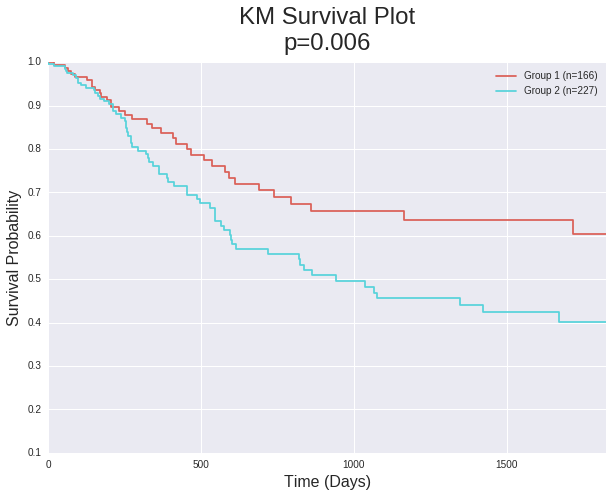

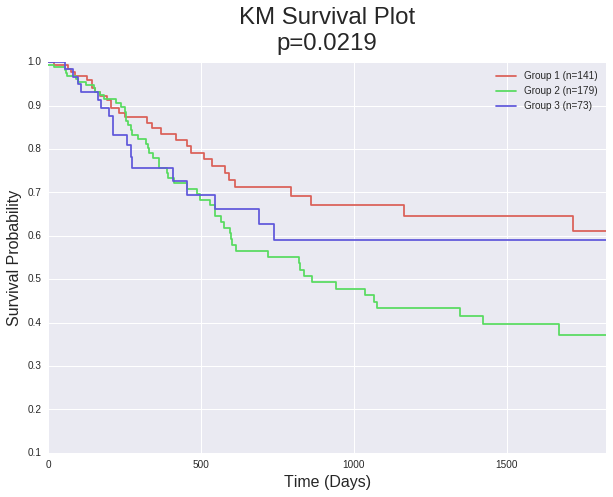

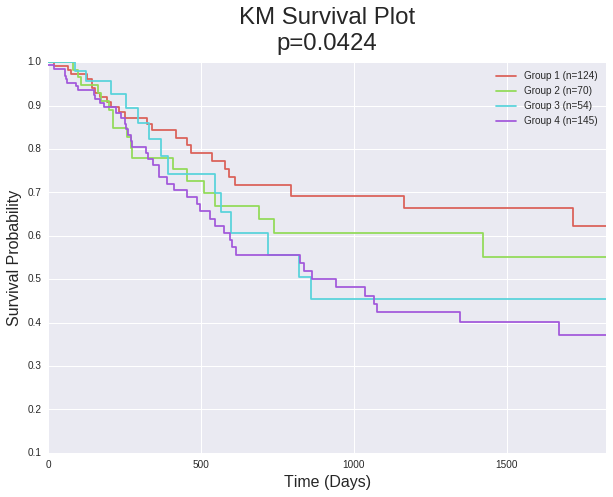

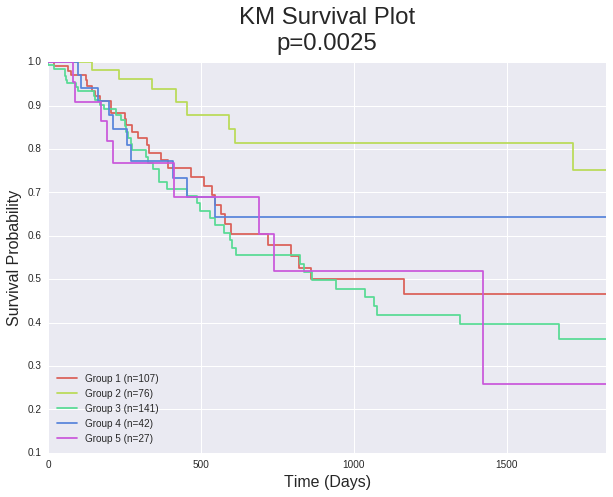

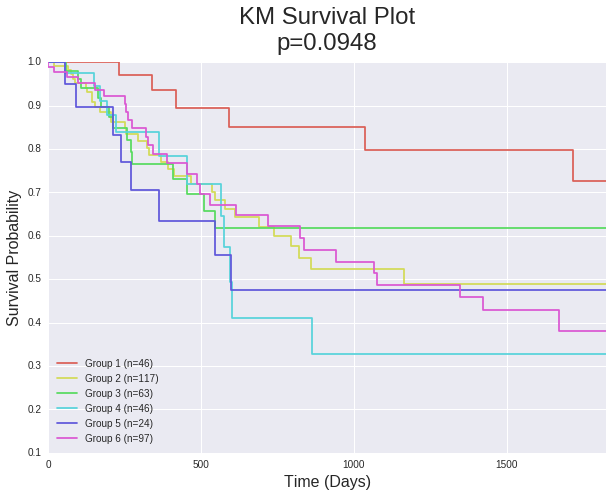

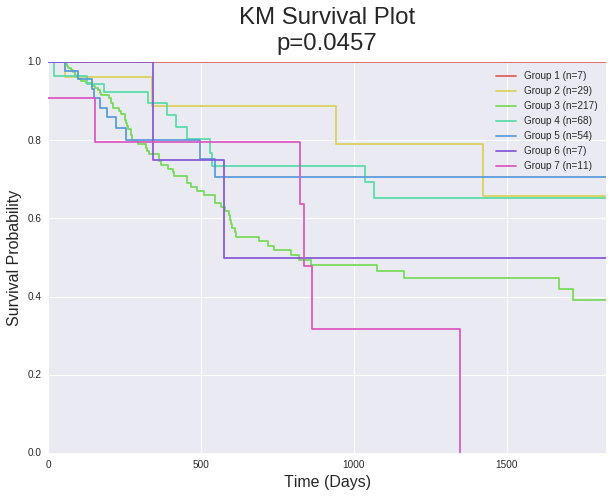

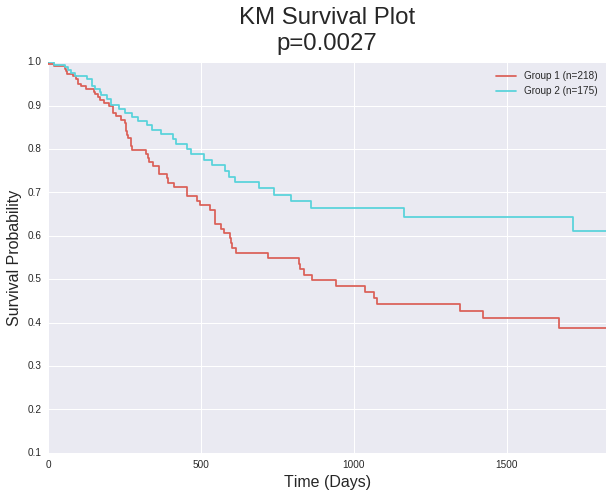

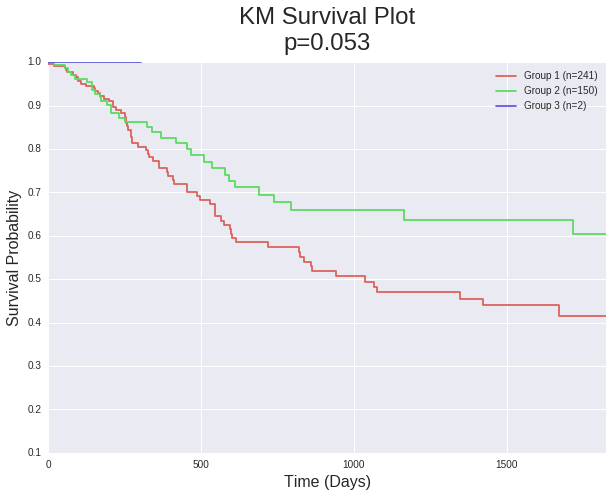

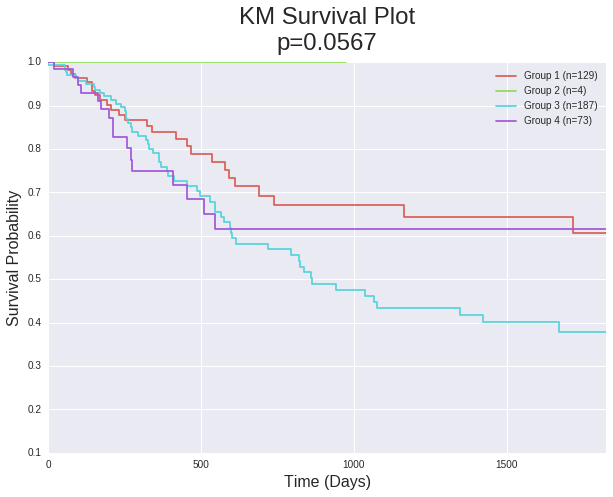

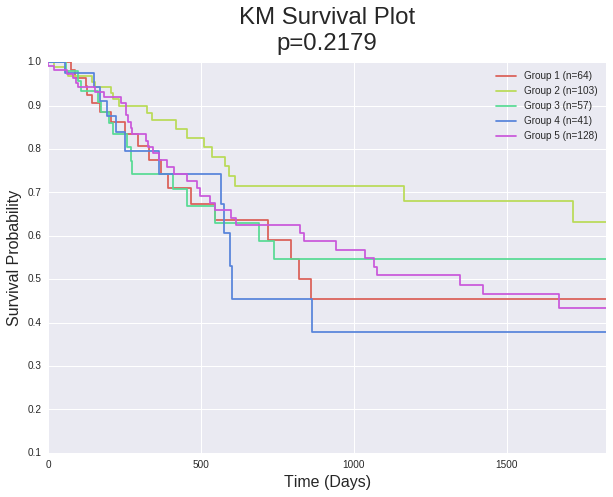

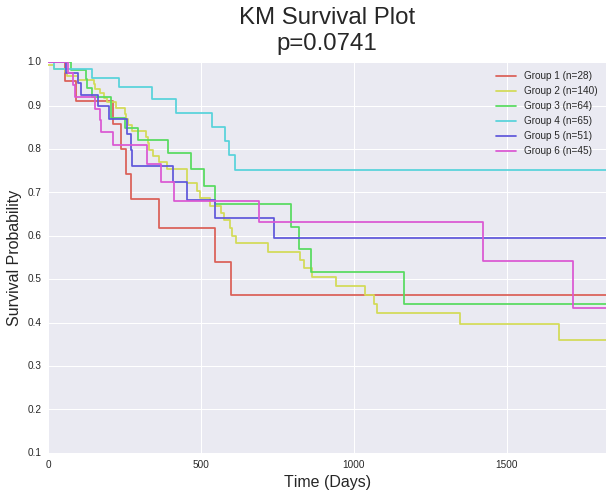

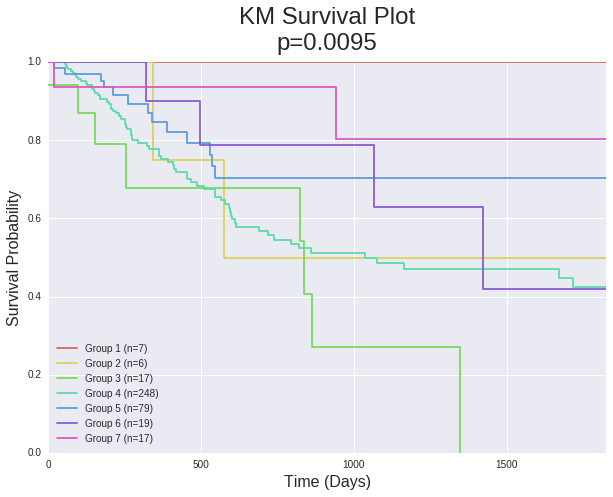

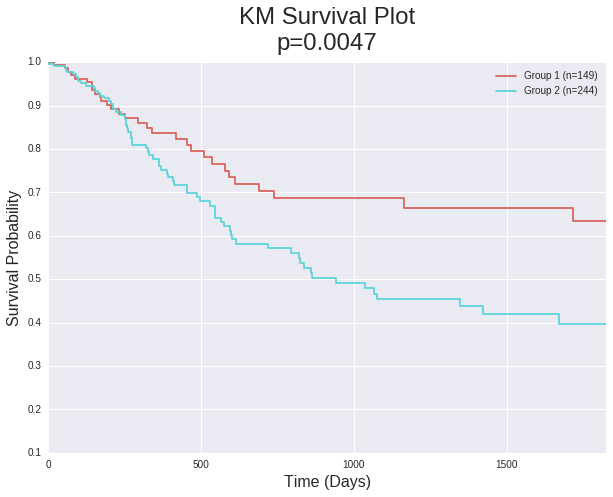

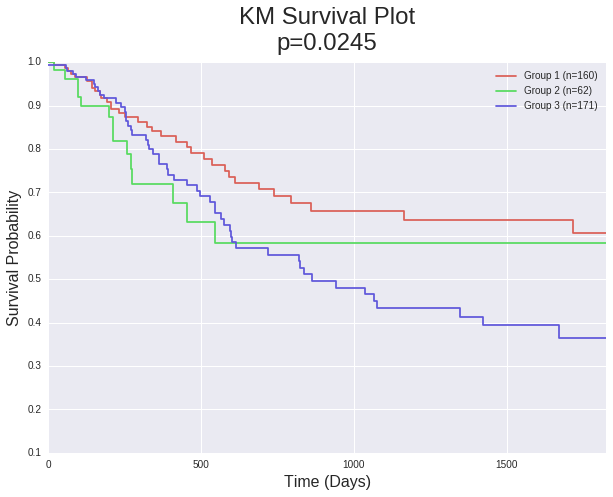

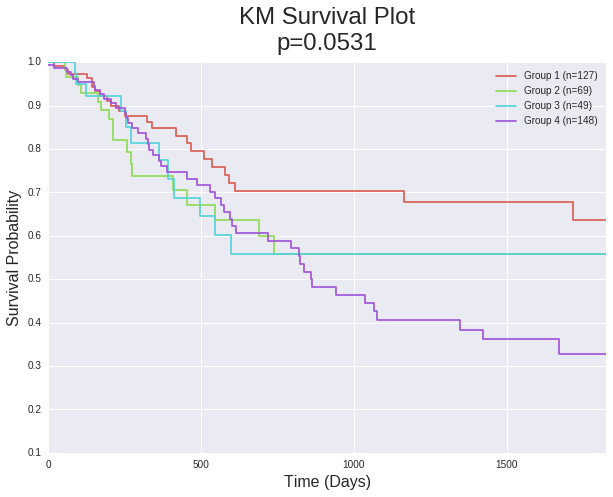

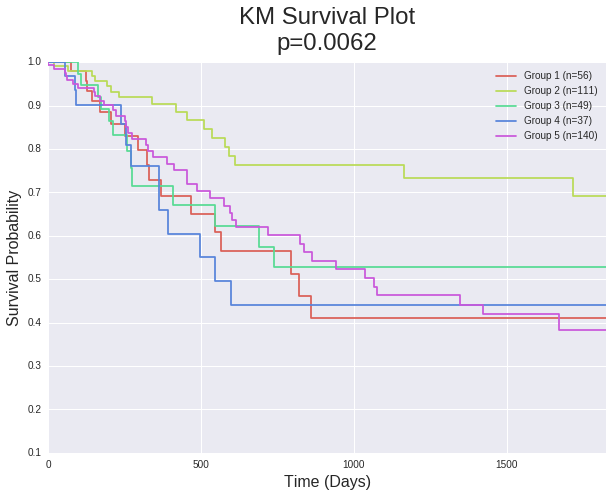

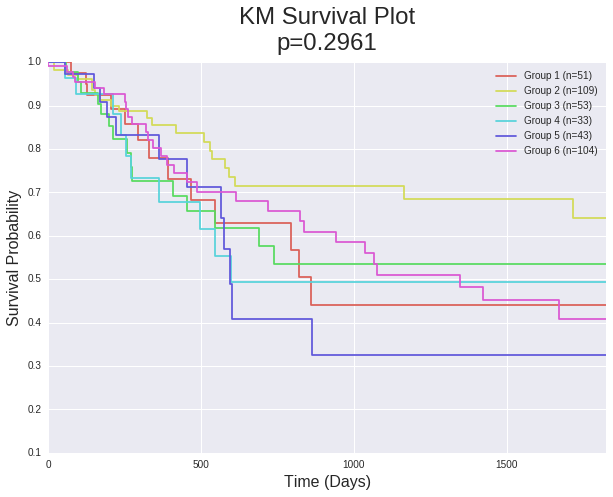

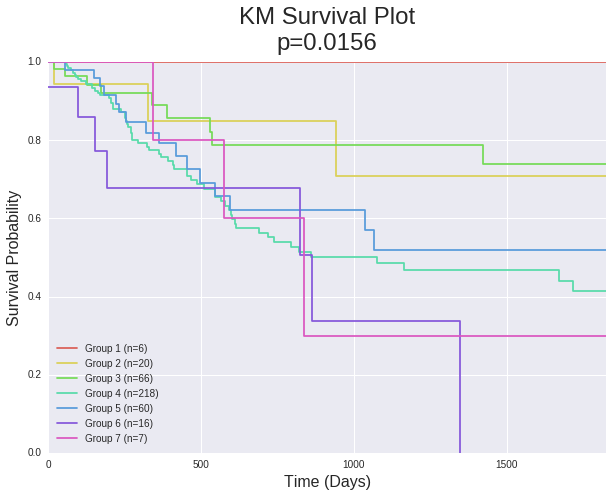

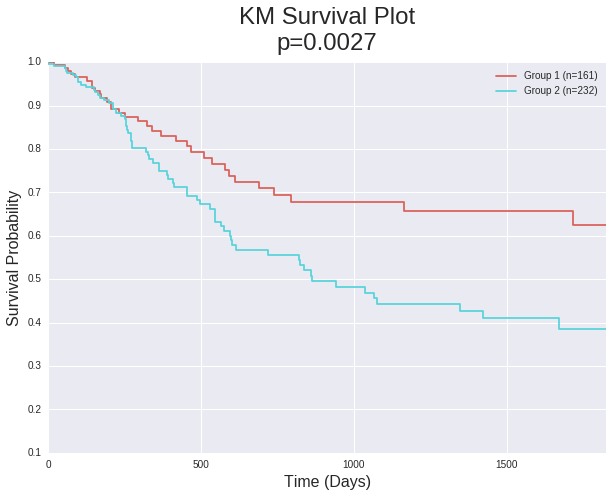

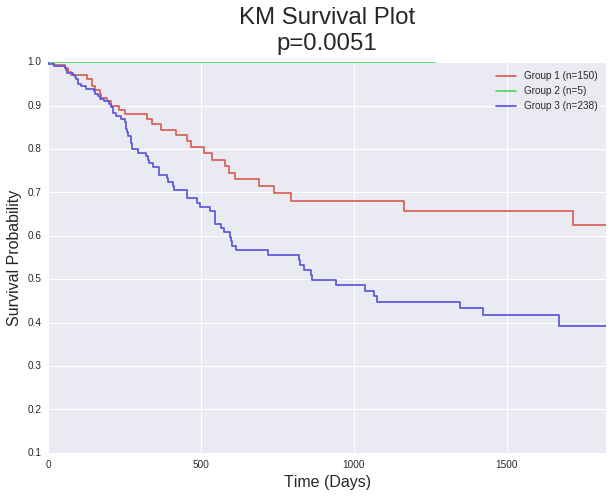

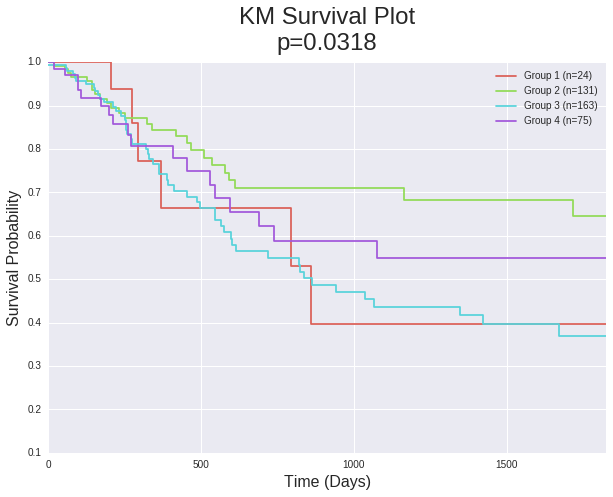

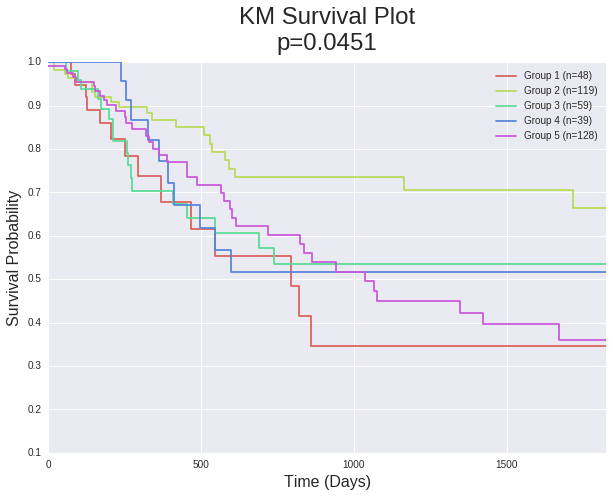

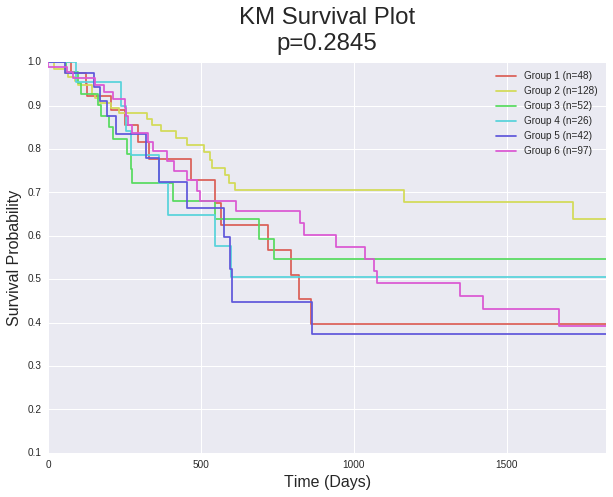

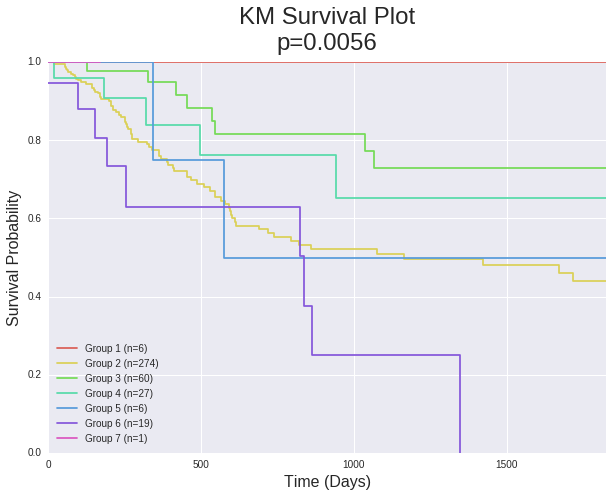

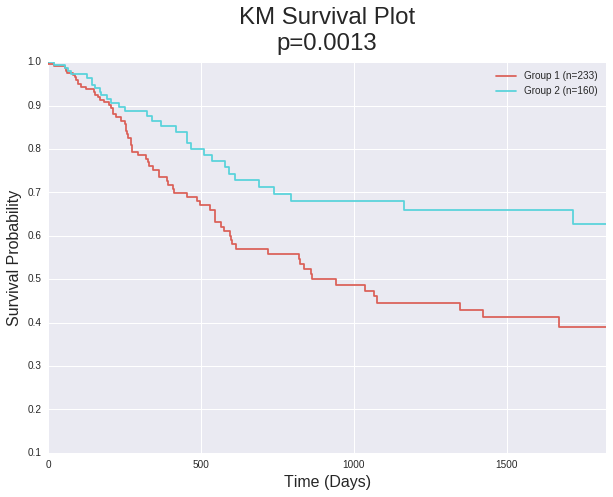

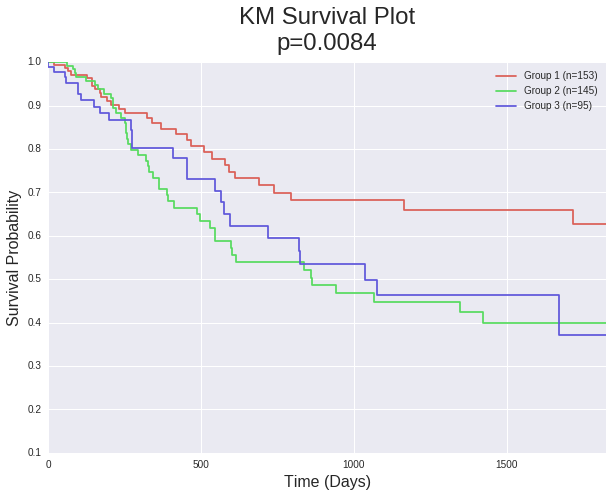

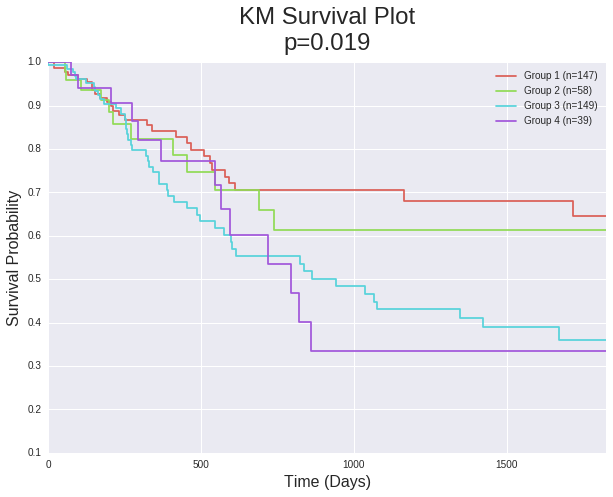

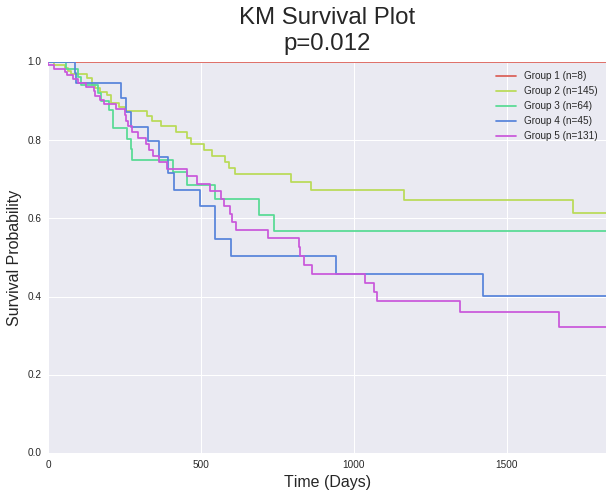

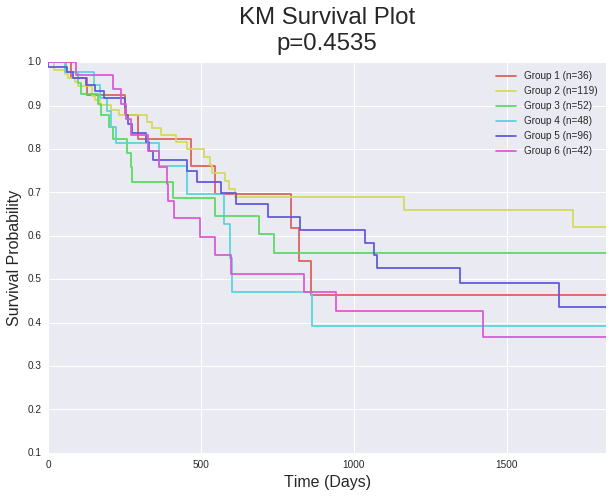

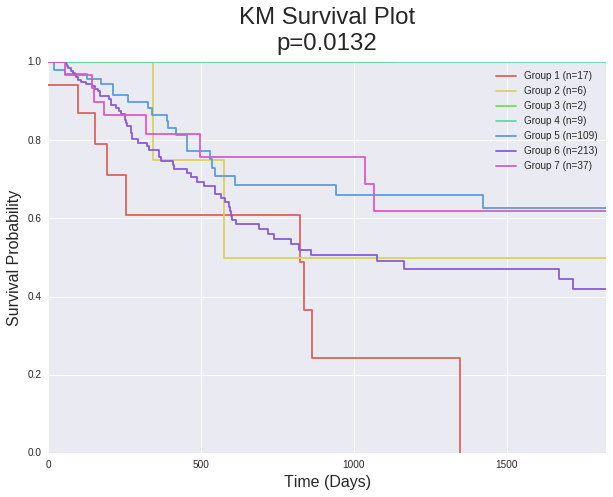

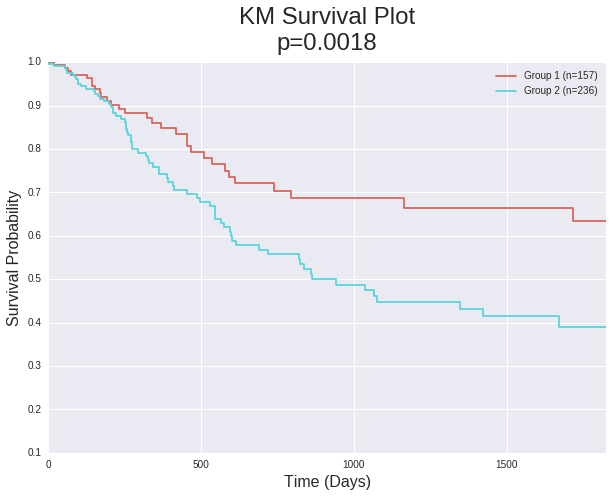

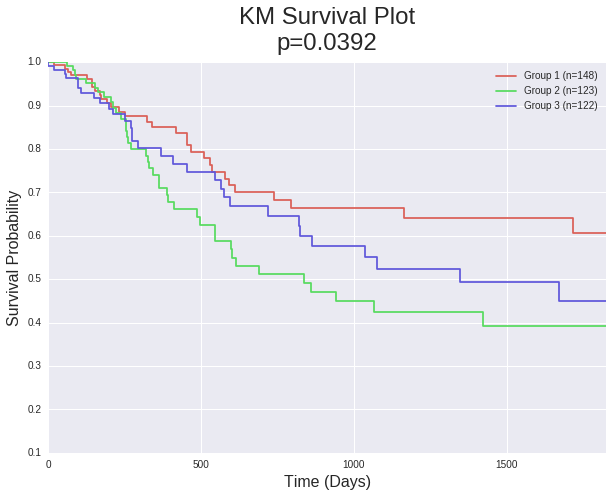

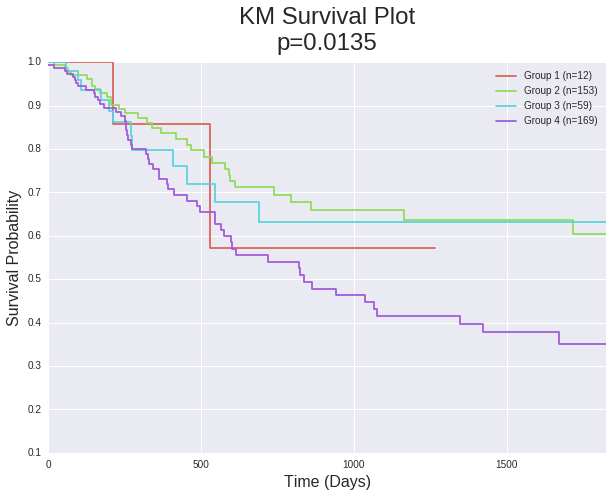

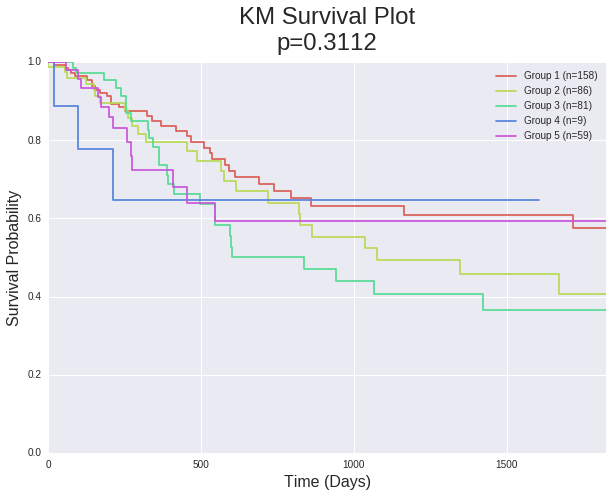

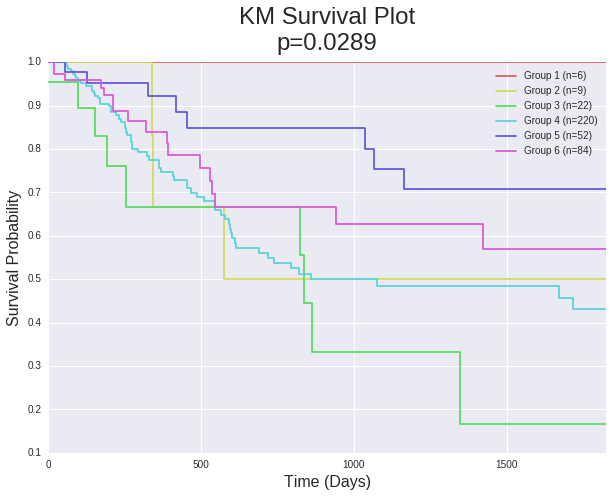

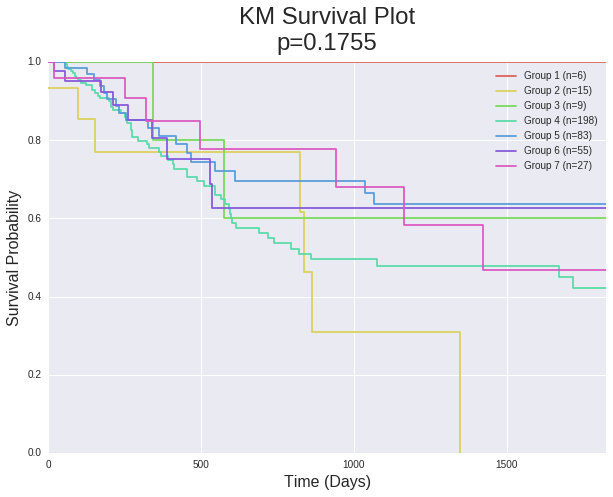

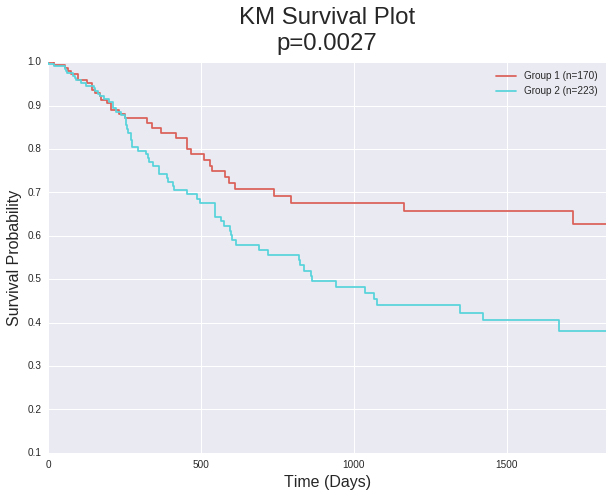

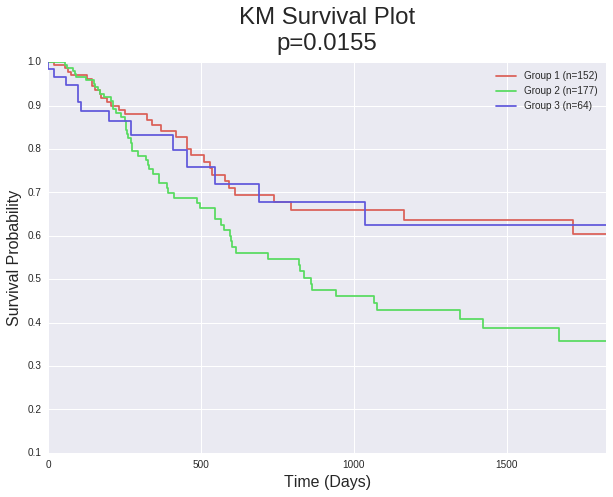

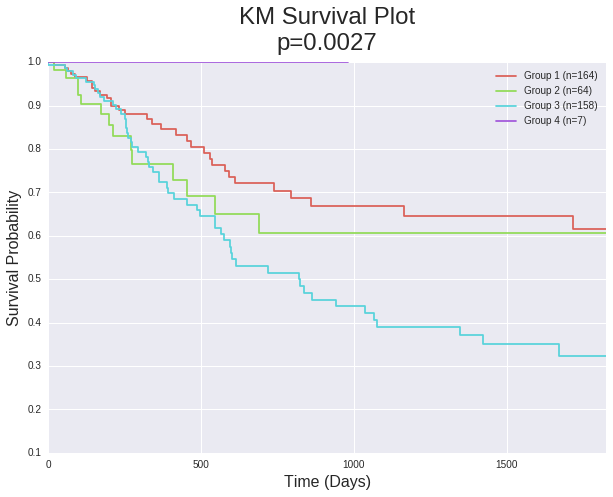

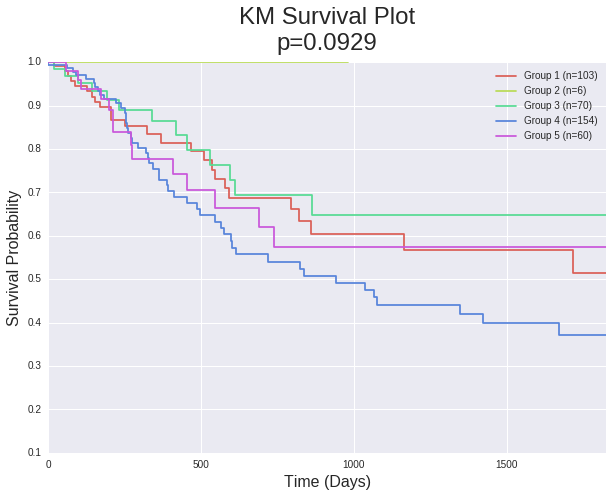

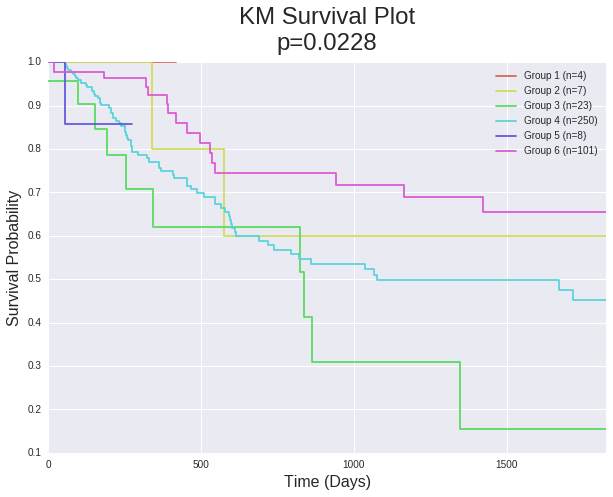

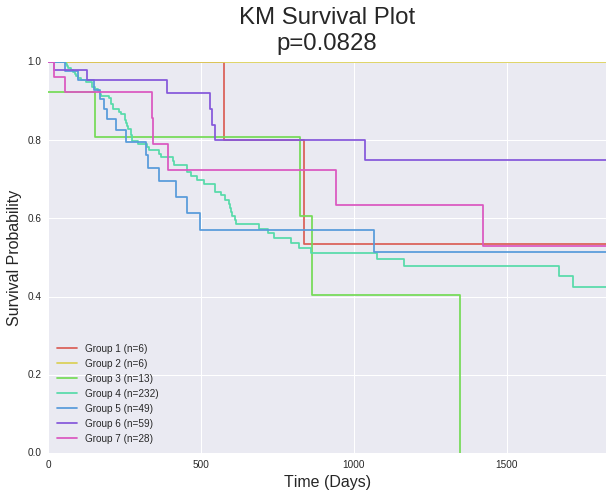

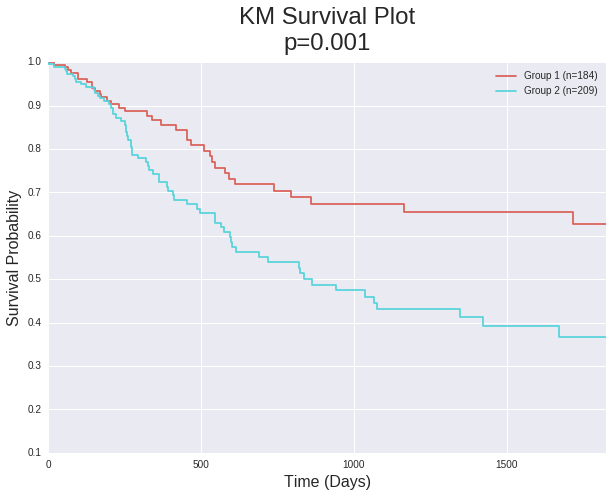

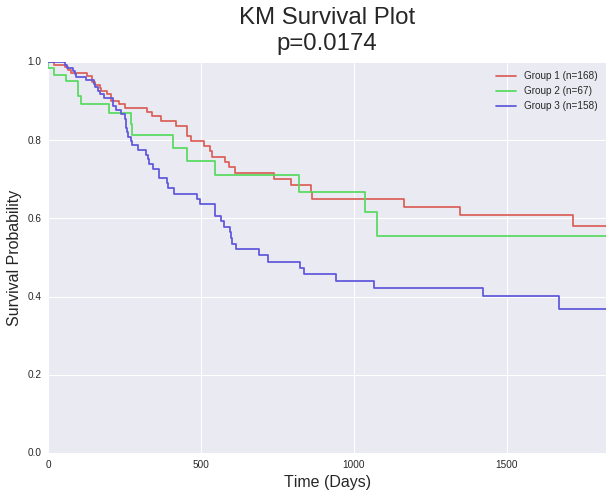

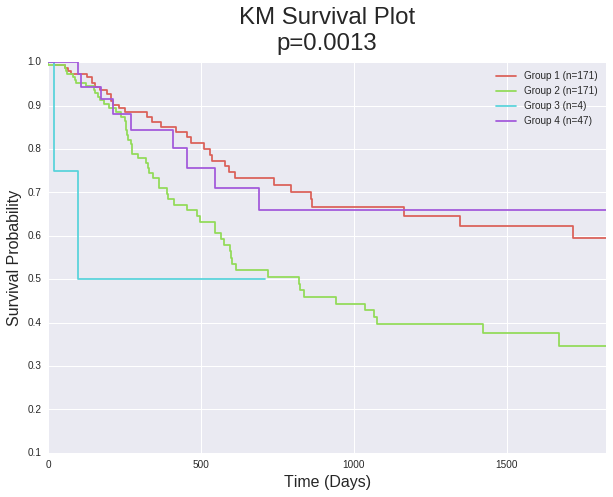

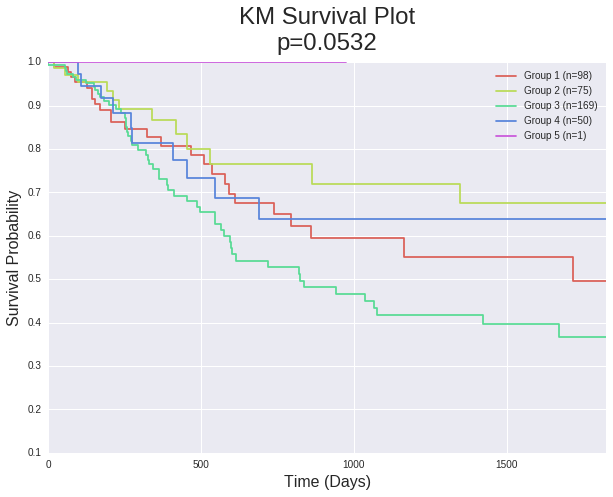

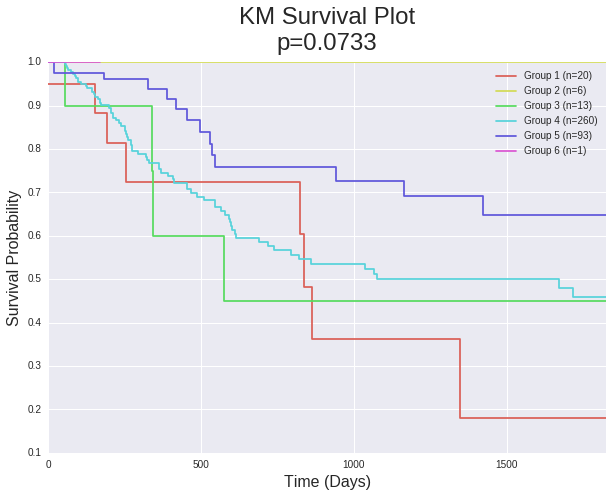

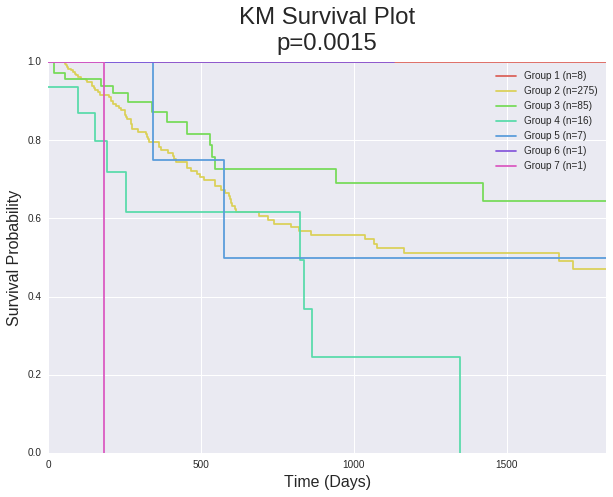

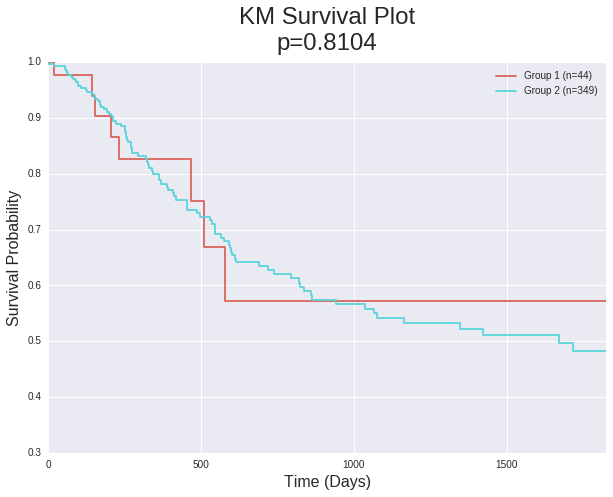

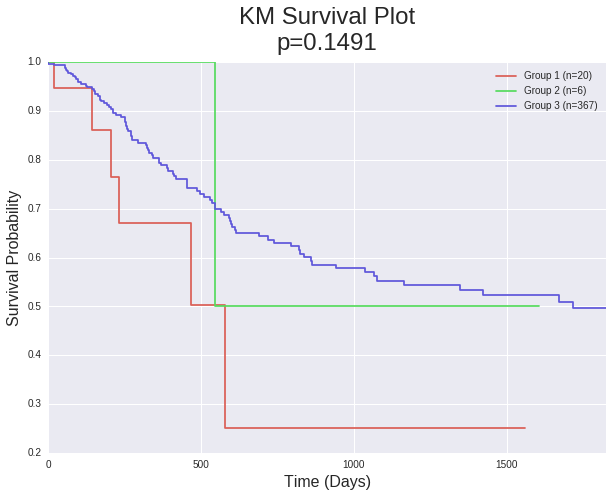

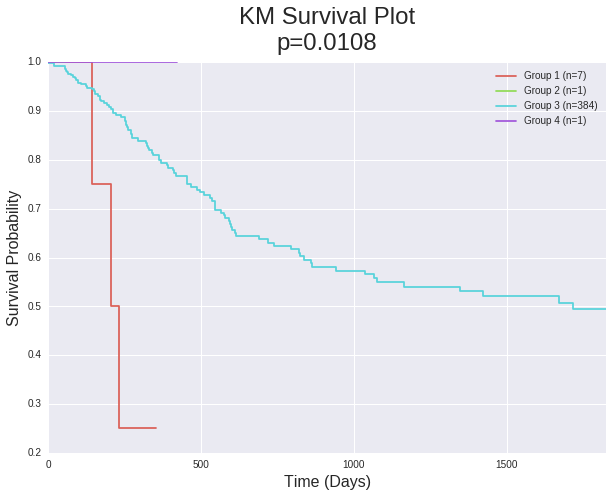

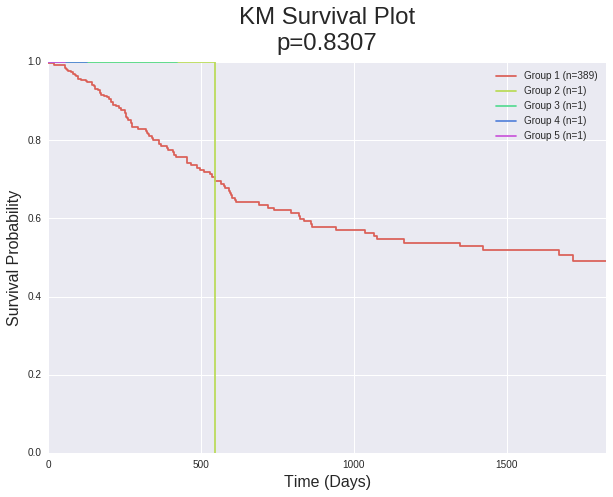

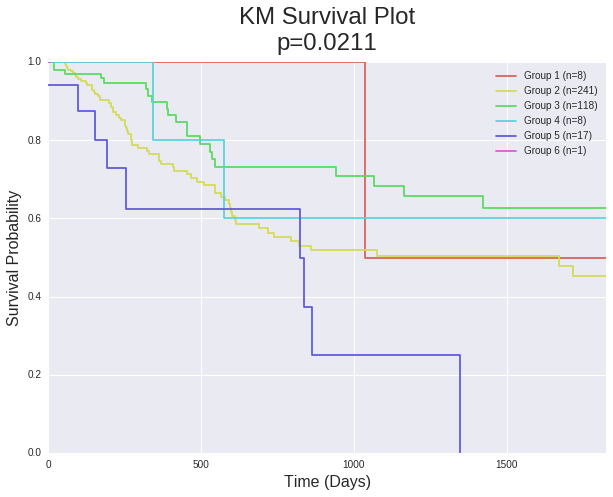

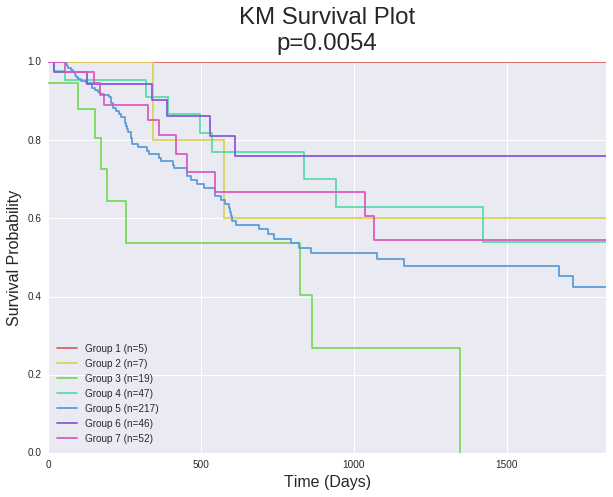

In [17]:
for a in np.arange(0.1, 1.0, 0.1):
    for k in range(2,8):
        fn = 'BLCA_k'+repr(k)+'_a'+str(a)+'_cluster_assignments.csv'
        assignment = pd.read_csv(folder_path+fn, header=None, index_col=0,squeeze=True)
        p = plot.cluster_KMplot(assignment, clin_data_fn, delimiter=',', lr_test=True, verbose=False)
        p_df.loc[a][k] = -np.log10(p)

In [18]:
p_df

,2,3,4,5,6,7
0.1,2.221106,1.658569,1.372946,2.597558,1.023149,1.340425
0.2,2.562919,1.275975,1.246198,0.661806,1.130171,2.024347
0.3,2.326924,1.610893,1.275118,2.205456,0.528534,1.807592
0.4,2.561912,2.295768,1.497369,1.345896,0.545860,2.248236
0.5,2.875911,2.075961,1.721468,1.919551,0.343402,1.878500
0.6,2.738815,1.406600,1.869591,0.506948,1.539049,0.755789
0.7,2.563155,1.808788,2.574627,1.031799,1.642385,1.081845
0.8,3.016500,1.759330,2.876463,1.273812,1.135086,2.825417
0.9,0.091279,0.826384,1.968307,0.080569,1.676369,2.270427


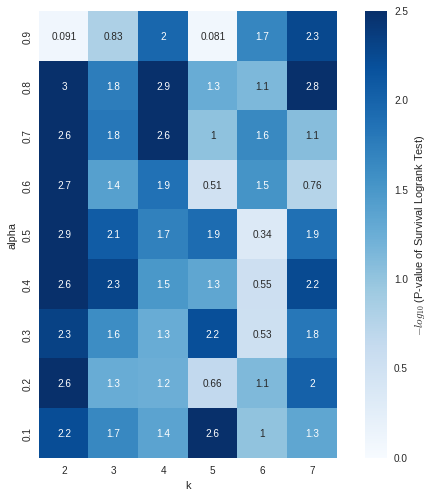

In [19]:
# compare with all alpha with k=4
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(p_df,vmin=0, vmax=2.5,annot=True,square=True,ax=ax,cmap='Blues',
            cbar_kws={'label': r'$-log_{10}$ (P-value of Survival Logrank Test)'})
ax.invert_yaxis()
ax.set_xlabel('k')
ax.set_ylabel('alpha')
plt.show()

#### Stochasticity of pyNBS

In [5]:
default_cluster_assigns = []
for fn in os.listdir(default_path):
    if 'default' in fn and 'cluster_assignments' in fn:
        df = pd.read_csv(default_path+fn,header=None, index_col=0)
        df.columns = [int(fn.split('_')[2])]
        default_cluster_assigns.append(df)
concat = pd.concat(default_cluster_assigns, axis=1)
concat = concat[sorted(concat.columns)]

In [6]:
concat

,1,2,3,4,5,6,7,8,9,10
0,,,,,,,,,,
TCGA-2F-A9KO,1,1,1,1,2,1,1,2,1,2
TCGA-2F-A9KP,3,3,2,3,3,4,3,4,4,4
TCGA-2F-A9KQ,3,3,2,3,3,4,3,4,4,4
TCGA-2F-A9KR,2,4,3,2,4,3,4,3,3,3
TCGA-2F-A9KT,1,1,1,1,2,1,1,2,1,2
TCGA-2F-A9KW,3,3,2,3,3,4,3,4,4,4
TCGA-4Z-AA7M,1,1,1,1,2,1,1,2,1,2
TCGA-4Z-AA7N,3,3,2,3,3,4,3,4,4,4
TCGA-4Z-AA7O,3,3,2,3,3,4,3,4,4,4


In [7]:
ari_df = pd.DataFrame(np.zeros((10,10)),index=range(1,11), 
             columns=range(1,11))
for i in range(1, 11):
    for j in range(1, 11):
        ari_df.loc[i][j] = adjusted_rand_score(concat.loc[:, i], concat.loc[:, j])

In [8]:
ari_df

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.829870,0.780783,0.821883,0.792485,0.786204,0.795763,0.810653,0.773591,0.799156
2,0.829870,1.000000,0.785494,0.817576,0.837763,0.891608,0.863687,0.825005,0.855542,0.876420
3,0.780783,0.785494,1.000000,0.847602,0.713554,0.851911,0.788187,0.830445,0.783618,0.797774
4,0.821883,0.817576,0.847602,1.000000,0.737761,0.798011,0.771454,0.832343,0.816403,0.818421
5,0.792485,0.837763,0.713554,0.737761,1.000000,0.829880,0.837267,0.780439,0.814124,0.858010
6,0.786204,0.891608,0.851911,0.798011,0.829880,1.000000,0.876249,0.878007,0.885109,0.874566
7,0.795763,0.863687,0.788187,0.771454,0.837267,0.876249,1.000000,0.852634,0.842727,0.835278
8,0.810653,0.825005,0.830445,0.832343,0.780439,0.878007,0.852634,1.000000,0.857232,0.828261
9,0.773591,0.855542,0.783618,0.816403,0.814124,0.885109,0.842727,0.857232,1.000000,0.820326
10,0.799156,0.876420,0.797774,0.818421,0.858010,0.874566,0.835278,0.828261,0.820326,1.000000


In [9]:
ari_vect = np.array(ari_df)[np.triu_indices(10, 1)]

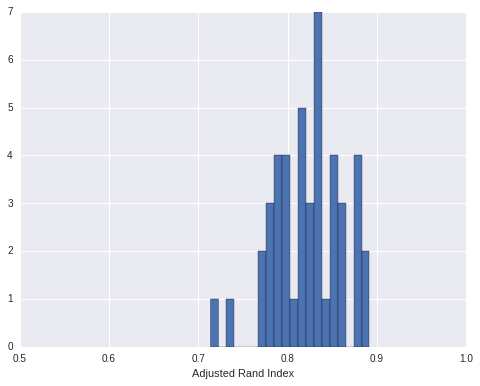

In [12]:
fig, ax = plt.subplots(figsize=(8,6))  
plt.hist(ari_vect, bins=20)
ax.set_xlabel('Adjusted Rand Index')
ax.set_xlim(0.5,1)
plt.show()

/cellar/users/jkhuang/anaconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:225: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


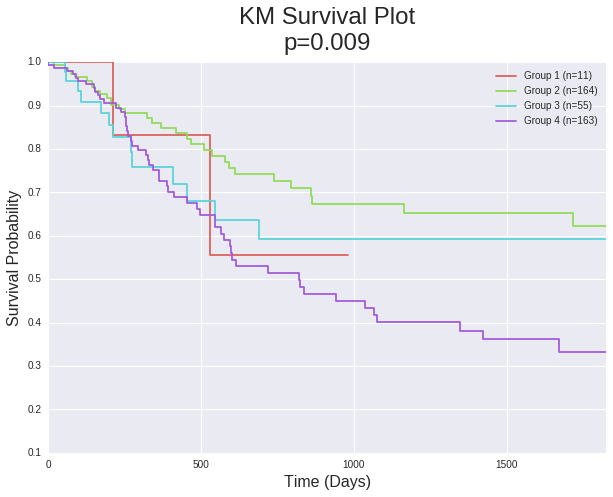

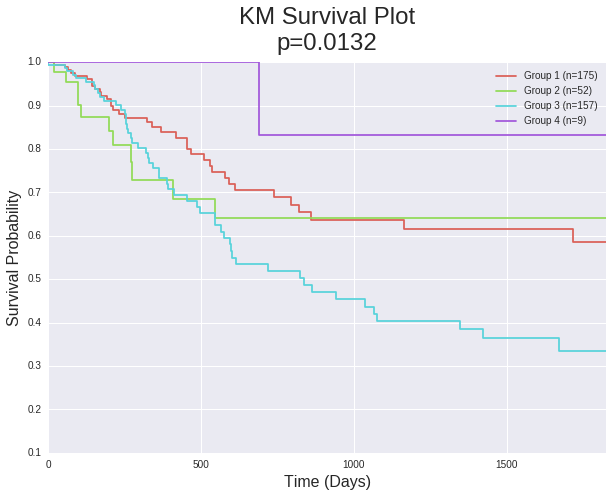

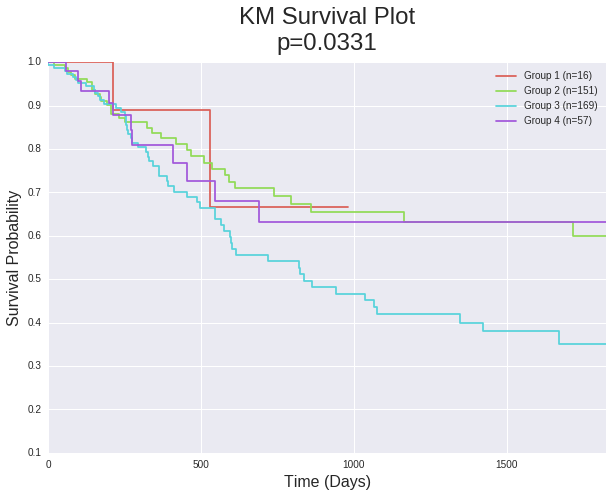

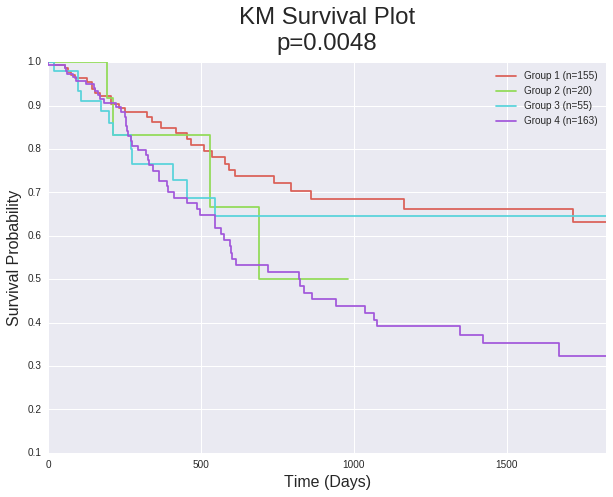

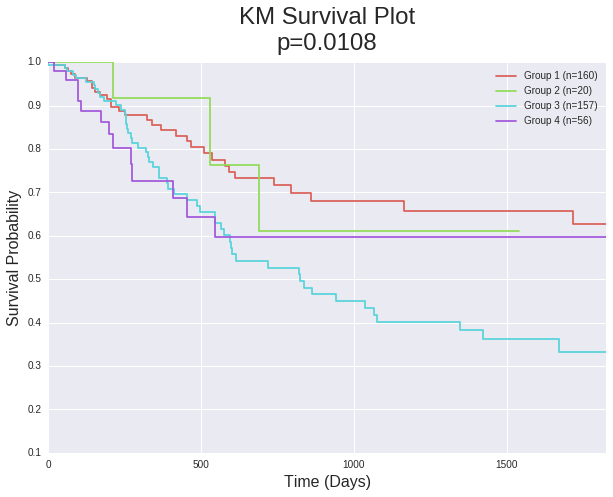

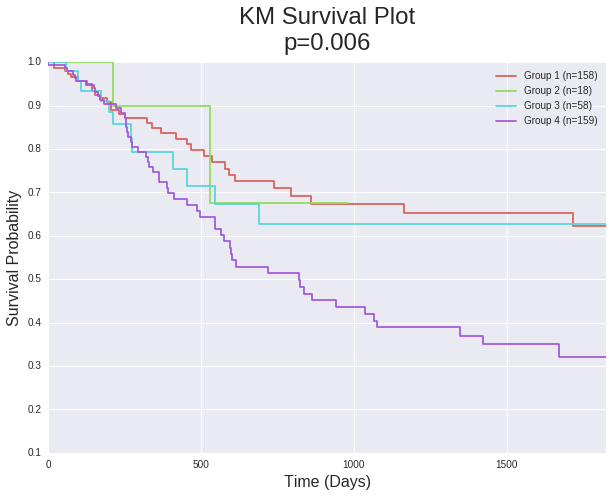

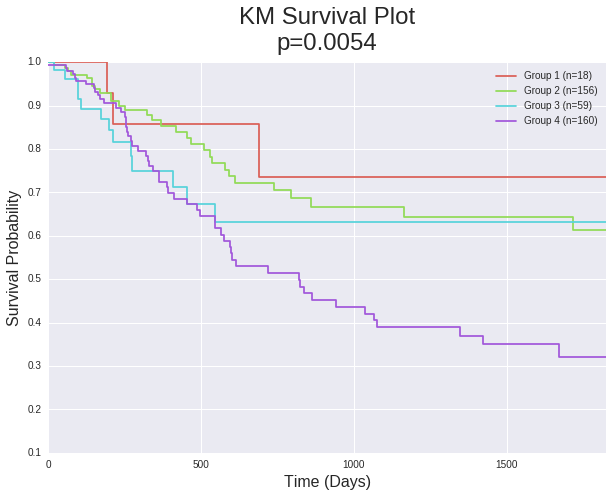

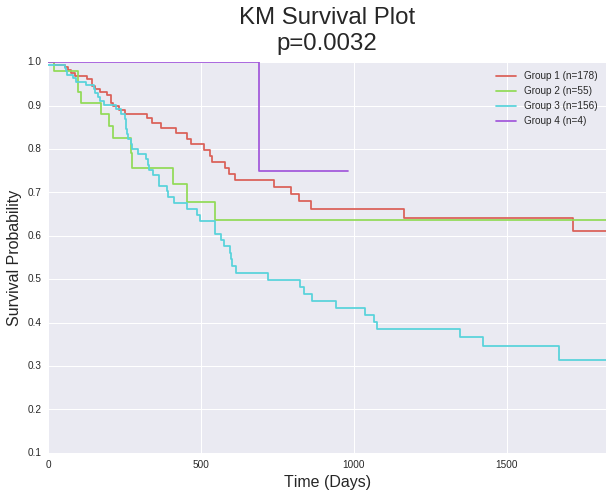

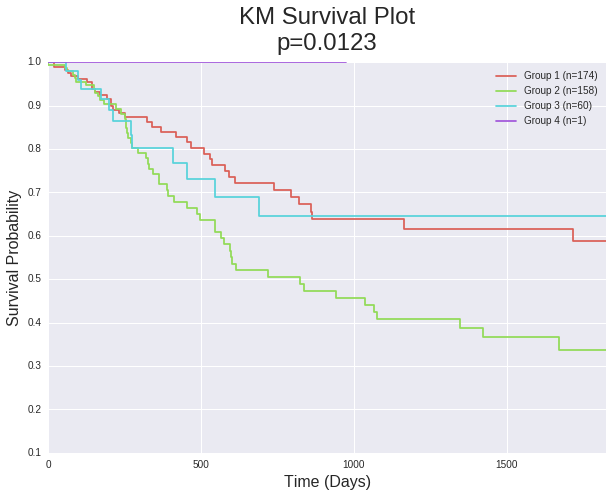

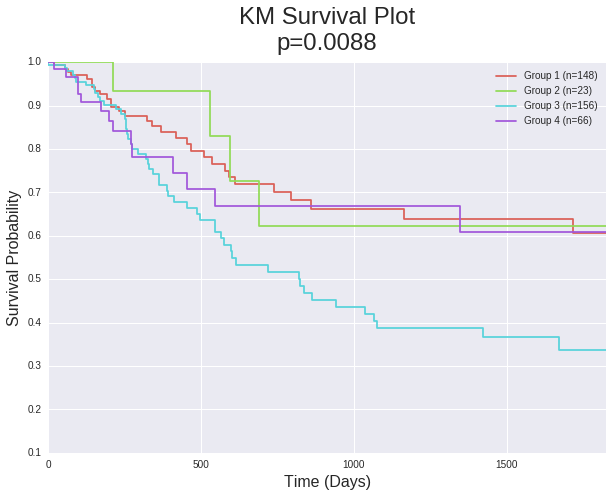

In [13]:
default_p_vect = []
for fn in os.listdir(default_path):
    if 'default' in fn and 'cluster_assignments' in fn:
        df = pd.read_csv(default_path+fn,header=None, index_col=0, squeeze=True)
        p = plot.cluster_KMplot(df, clin_data_fn, delimiter=',', lr_test=True, verbose=False)
        default_p_vect.append(p)

In [14]:
default_p_vect

[0.0089519154750917901,
 0.013163341120733266,
 0.033145169167081372,
 0.0047597008563565199,
 0.010780901419620167,
 0.0060446716628185992,
 0.0054391212055487212,
 0.0032498139873293262,
 0.01230651186513005,
 0.0087752557153112868]

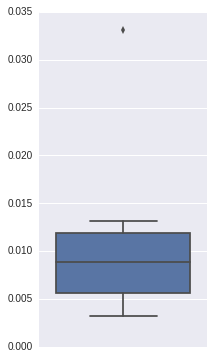

In [15]:
fig, ax = plt.subplots(figsize=(3,6))  
ax = sns.boxplot(y=default_p_vect)
plt.show()

/cellar/users/jkhuang/Data/nosnap/Projects/pyNBS/supp_run_pyNBS_2018-01-29/